### Outlier And Its Impacts On Machine Learning UseCases

##### Which Machine LEarning Models Are Sensitive To Outliers?

1. Naivye Bayes Classifier--- Not Sensitive To Outliers

2. SVM-------- Not Sensitive To Outliers


3. Decision Tree Regressor or Classifier---- Not Sensitive

4. Ensemble(RF,XGboost,GB)------- Not Sensitive

5. KNN--------------------------- Not Sensitive


6. Linear Regression---------- Sensitive To Outliers

7. Logistic Regression------- Sensitive To Outliers

8. Kmeans------------------------ Sensitive

9. Hierarichal------------------- Sensitive

10. PCA-------------------------- Sensitive

11. Neural Networks-------------- Sensitive

In [2]:
import pandas as pd 
import seaborn as sns 


In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['age'].isnull().sum()

177

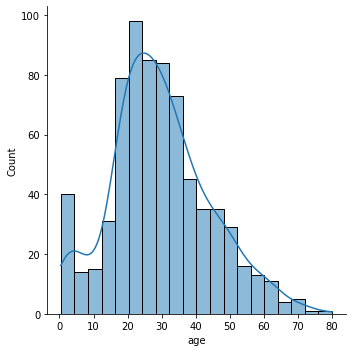

In [6]:
sns.displot(df['age'].dropna(),kde=True)

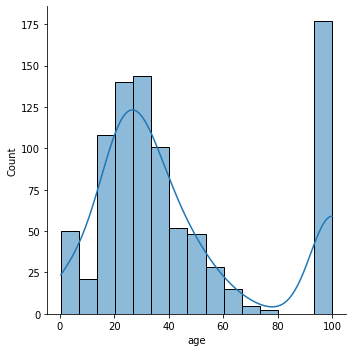

In [7]:
sns.displot(df['age'].fillna(100),kde=True)

## Gaussain Distribution 

Text(0, 0.5, 'NO of passagener')

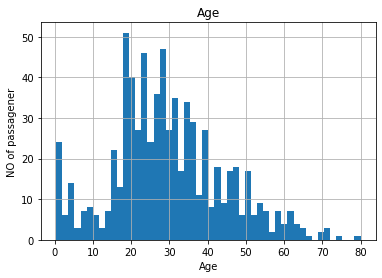

In [9]:
figure = df.age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("NO of passagener")

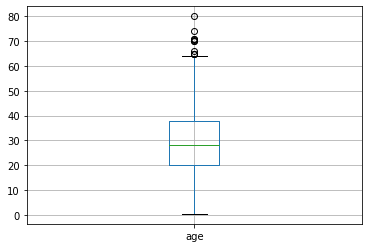

In [10]:
figure = df.boxplot(column='age')

In [11]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [12]:
##### Assuming Age follows A Gaussian distribution we will calculate the boundaries which differentate the outers 

upper_boundary = df['age'].mean() + 3*df.age.std()
lower_boundary = df['age'].mean() - 3*df.age.std()
print(upper_boundary,lower_boundary,df['age'].mean())

73.27860964406095 -13.88037434994331 29.69911764705882


In [13]:
# lets computer the Interquantitle range to calculate the boundaries 

IQR = df.age.quantile(0.75)-df.age.quantile(0.25)
IQR

17.875

In [26]:
lower_bridge =df['age'].quantile(0.25) - (IQR*1.5)
upper_bridge =df['age'].quantile(0.75) + (IQR*1.5)
print(lower_bridge,upper_bridge)

-14.5094 72.6344


## Feature is Skewed 

Text(0, 0.5, 'NO of passagener')

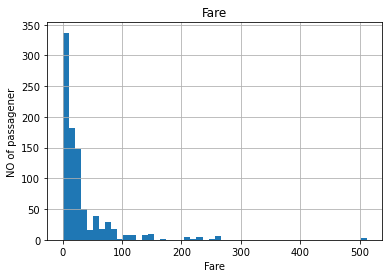

In [16]:
figure = df.fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("NO of passagener")

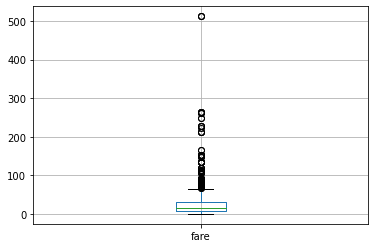

In [17]:
figure = df.boxplot(column='fare')

In [18]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [19]:
# lets computer the Interquantitle range to calculate the boundaries 

IQR = df.fare.quantile(0.75)-df.fare.quantile(0.25)
IQR

23.0896

In [25]:
###  Outliers 
lower_bridge =df['fare'].quantile(0.25) - (IQR*1.5)
upper_bridge =df['fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [24]:
### Exteme Outliers 
lower_bridge =df['fare'].quantile(0.25) - (IQR*3)
upper_bridge =df['fare'].quantile(0.75) + (IQR*3)
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [40]:
data = df.copy()

In [41]:
data.loc[data['age']>=73,'age'] =73

In [42]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0, 0.5, 'NO of passagener')

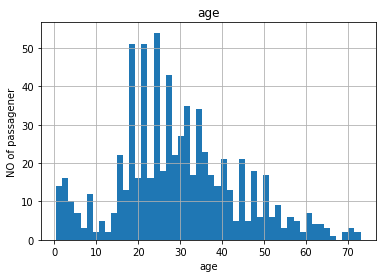

In [46]:
figure = data.age.hist(bins=50)
figure.set_title("age")
figure.set_xlabel("age")
figure.set_ylabel("NO of passagener")

In [43]:
data.loc[data['fare']>=100,'fare'] =100

In [44]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0, 0.5, 'NO of passagener')

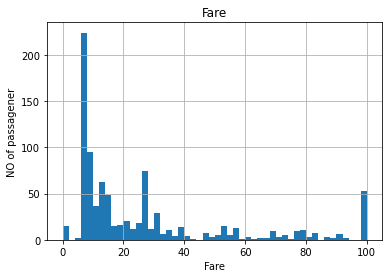

In [45]:
figure = data.fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("NO of passagener")

In [84]:
from sklearn.model_selection import train_test_split

# X_train,X-test,y_train,y_test = train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size = 0.3)

In [85]:
X-train,X_test,y_train,y_test = train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size = 0.3)

SyntaxError: cannot assign to operator (<ipython-input-85-adac4004f23f>, line 1)

In [77]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,0.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
